<a href="https://colab.research.google.com/github/hemanth2000/sparsity-compression/blob/main/CompressedSensing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sparsity

Representation of a large data in a coordinate system such that most of the components are zero. 

$$X=\Psi S$$

where, $X$ is original signal, $\Psi$ is transformation matrix, and $S$ is coefficients. $\Psi$ is also known as Universal basis.

Here most of the elements in $S$ are zero which makes it sparse. Neglecting those elements and storing only non-zero values saves a lot of space and computation time. 

# Compressed Sensing

The idea of compressed sensing is that only some of the elements of $X$ are required to construct the full image.

Ofcourse the nonzero elements of $X$ must be known at random pixels. 

Let $Y$ be the sparse measuremnts of the image data. 


$$Y = C X = C \Psi S = \Theta S$$

The above problem is a underdertermined as number of equaitons are smaller than the number of variables. 

Here $S$ is unknown. $\Theta$ and $Y$ are known.

There are different ways to solve this problem. 

1. min $||C\Psi S-Y||_2+\lambda||S||_2$

2. min $||C\Psi S-Y||_2+\lambda||S||_1$

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import os
plt.rcParams['figure.figsize'] = [12, 18]
plt.rcParams.update({'font.size':18})

In [4]:
n = 1000    # Length of sparse vector S
p = 200     # Number of Measurments  
Theta = np.random.randn(p,n)
y = np.random.randn(p)

def L1_norm(x):
  return np.linalg.norm(x,ord=1)

constr = ({ 'type' : 'eq', 'fun': lambda x: Theta@x - y })
x0 = np.linalg.pinv(Theta) @ y
res = minimize(L1_norm, x0, method = 'SLSQP', constraints = constr)
s_L1 = res.x


- L1 norm gives sparse S

- L2 norm gives least squared solution to S

In [5]:
s_L2 = np.linalg.pinv(Theta)@y # L2 norm solution

(array([  0.,   0.,   0.,   0.,   1.,   5.,  12.,  67., 115., 188., 230.,
        190., 119.,  53.,  15.,   4.,   1.,   0.,   0.,   0.]),
 array([-0.105, -0.095, -0.085, -0.075, -0.065, -0.055, -0.045, -0.035,
        -0.025, -0.015, -0.005,  0.005,  0.015,  0.025,  0.035,  0.045,
         0.055,  0.065,  0.075,  0.085,  0.095]),
 <a list of 20 Patch objects>)

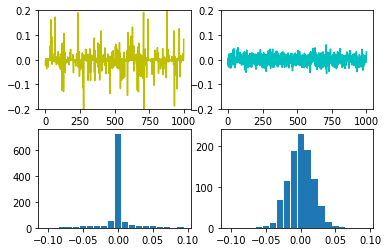

In [6]:
fig, axs = plt.subplots(2,2)
axs = axs.reshape(-1)

axs[0].plot(s_L1,color='y',LineWidth=1.5)
axs[0].set_ylim(-0.2,0.2)
axs[1].plot(s_L2,color='c',LineWidth=1.5)
axs[1].set_ylim(-0.2,0.2)
axs[2].hist(s_L1,bins=np.arange(-0.105,0.105,0.01),rwidth=0.9)
axs[3].hist(s_L2,bins=np.arange(-0.105,0.105,0.01),rwidth=0.9)


From the plots, S from L1-norm is much sparser than L2-norm. 